In [1]:
import turicreate

In [15]:
def polynomial_sframe(feature, degree):
    poly_sframe = turicreate.SFrame()
    poly_sframe['power_1'] = feature
    
    for i in range(2,degree+1):
        poly_sframe['power_'+str(i)] = poly_sframe['power_'+str(i-1)] * feature
    
    return poly_sframe

In [6]:
sales = turicreate.SFrame('home_data.sframe/')
sales = sales.sort(['sqft_living','price'])

In [7]:
poly1_data = polynomial_sframe(sales['sqft_living'],1)

In [10]:
poly1_data['price'] = sales['price']

In [11]:
model1 = turicreate.linear_regression.create(poly1_data,target='price',
                                            features=['power_1'],validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.003802     | 4362074.696077     | 261440.790724                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

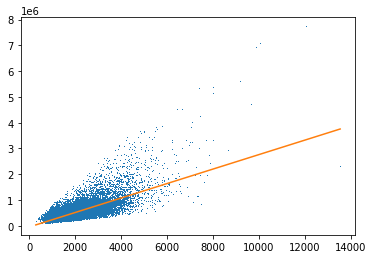

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'],poly1_data['price'],',',
         poly1_data['power_1'],model1.predict(poly1_data),'-')

In [20]:
poly15_data = polynomial_sframe(sales['sqft_living'],15)
poly15_data['price'] = sales['price']

In [35]:
features_15 = ['power_'+str(i) for i in range(1,16)]

In [49]:
model2 = turicreate.linear_regression.create(poly15_data,
    features=['power_1','power_2'],target='price',validation_set=None)
model3 = turicreate.linear_regression.create(poly15_data,
    features=['power_1','power_2','power_3'],target='price',validation_set=None)
model15 = turicreate.linear_regression.create(poly15_data,
    features=features_15,target='price',validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.012115     | 5913020.984255     | 250948.368758                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.016713     | 3261066.736007     | 249261.286346                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.016578     | 2662308.584337     | 245690.511190                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

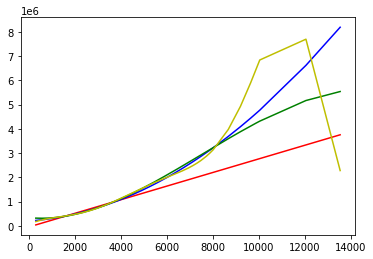

In [50]:
plt.plot(poly15_data['power_1'],model1.predict(poly15_data),'r-',
        poly15_data['power_1'],model2.predict(poly15_data),'b-',
        poly15_data['power_1'],model3.predict(poly15_data),'g-',
        poly15_data['power_1'],model15.predict(poly15_data),'y-')

In [27]:
model15.coefficients

name,index,value,stderr
(intercept),None,539916.0118223923,2493.1874451583253
power_15,None,3.264465461658053e-56,3.830912836922123e-57


In [31]:
subA,subB = sales.random_split(.5,seed=0)
(set_1,set_2),(set_3,set_4) = subA.random_split(.5,seed=0),subB.random_split(.5,seed=0)

In [32]:
subpoly_1 = polynomial_sframe(set_1['sqft_living'],15)
subpoly_2 = polynomial_sframe(set_2['sqft_living'],15)
subpoly_3 = polynomial_sframe(set_3['sqft_living'],15)
subpoly_4 = polynomial_sframe(set_4['sqft_living'],15)

subpoly_1['price'] = set_1['price']
subpoly_2['price'] = set_2['price']
subpoly_3['price'] = set_3['price']
subpoly_4['price'] = set_4['price']

In [36]:
model15_sub1 = turicreate.linear_regression.create(subpoly_1,
    features=features_15,target='price',validation_set=None)
model15_sub2 = turicreate.linear_regression.create(subpoly_2,
    features=features_15,target='price',validation_set=None)
model15_sub3 = turicreate.linear_regression.create(subpoly_3,
    features=features_15,target='price',validation_set=None)
model15_sub4 = turicreate.linear_regression.create(subpoly_4,
    features=features_15,target='price',validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.009674     | 2195218.932304     | 248858.822200                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.018376     | 2069212.978546     | 234840.067186                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.007208     | 2269769.506523     | 251460.072754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.011768     | 2314893.173830     | 244563.136754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [48]:
print(model15_sub1.coefficients.tail())
print(model15_sub2.coefficients.tail())
print(model15_sub3.coefficients.tail())
print(model15_sub4.coefficients.tail())

+----------+-------+-------------------------+------------------------+
|   name   | index |          value          |         stderr         |
+----------+-------+-------------------------+------------------------+
| power_6  |  None |  1.1544030340554102e-17 | 1.2178613580615915e-13 |
| power_7  |  None |  1.051458694110244e-21  | 2.230282102707865e-17  |
| power_8  |  None |  3.460496163770863e-26  | 7.594503430881997e-21  |
| power_9  |  None |  -1.096544539012122e-30 | 1.1349504148048181e-24 |
| power_10 |  None | -2.4203181207681755e-34 | 7.929342281060075e-29  |
| power_11 |  None | -1.9960120692236193e-38 | 3.5580527567016095e-33 |
| power_12 |  None | -1.0770990379471692e-42 | 3.096414468192052e-37  |
| power_13 |  None | -2.7286281794847945e-47 |          nan           |
| power_14 |  None |  2.4478269314433885e-51 |          nan           |
| power_15 |  None |  5.019752328560302e-55  | 1.8854788645076782e-50 |
+----------+-------+-------------------------+------------------

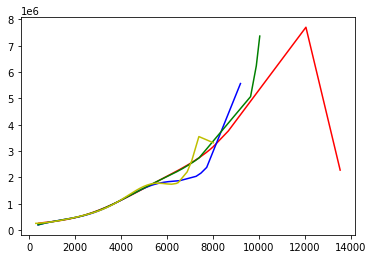

In [51]:
plt.plot(subpoly_1['power_1'],model15_sub1.predict(subpoly_1),'r-',
        subpoly_2['power_1'],model15_sub2.predict(subpoly_2),'b-',
        subpoly_3['power_1'],model15_sub3.predict(subpoly_3),'g-',
        subpoly_4['power_1'],model15_sub4.predict(subpoly_4),'y-')

In [52]:
train_validation_data,test_data = sales.random_split(.9,seed=1)
train_data,validation_data = train_validation_data.random_split(.5,seed=1)

In [53]:
train_data_poly15 = polynomial_sframe(train_data['sqft_living'],15)
train_data_poly15['price'] = train_data['price']
validation_data_poly15 = polynomial_sframe(validation_data['sqft_living'],15)
validation_data_poly15['price'] = validation_data['price']
test_data_poly15 = polynomial_sframe(test_data['sqft_living'],15)
test_data_poly15['price'] = test_data['price']

In [66]:
models = {}
myfeatures = []
for i in range(1,16):
    myfeatures.append('power_'+str(i))
    model = turicreate.linear_regression.create(train_data_poly15,
            features=myfeatures,target='price',verbose=False,validation_set=None)
    models[i] = model

In [67]:
def compute_rss(validation_set,target,model):
    predictions = model.predict(validation_set)
    rss = ((validation_set[target]-predictions)**2).sum()
    return rss

In [70]:
for i in models:
    print("RSS Degree " + str(i) + ":" + str(compute_rss(validation_data_poly15,'price',models[i])))

RSS Degree 1:676709775198048.0
RSS Degree 2:607090530698013.2
RSS Degree 3:616714574532763.2
RSS Degree 4:609129230654382.5
RSS Degree 5:599177138583639.8
RSS Degree 6:589182477809779.8
RSS Degree 7:591717038418299.9
RSS Degree 8:601558237777353.4
RSS Degree 9:612563853987570.5
RSS Degree 10:621744288938370.8
RSS Degree 11:627012012703704.8
RSS Degree 12:627757914766791.8
RSS Degree 13:624738503264298.0
RSS Degree 14:619369705894908.1
RSS Degree 15:613089202410699.5


In [71]:
compute_rss(test_data_poly15,'price',models[6])

125529337848169.66